In [1]:
# plots

# importing libraries 

from __future__ import division
from __future__ import print_function  
import warnings
import pandas as pd
import gsp_support as gsp
import matplotlib.pyplot as plt
import numpy as np
pd.options.plotting.backend = "plotly"
import datetime

# importing libraries for the plot

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [3]:
# read data and preprocess it
input_folder = 'FINAL/Disaggregation/stage2_filter/'
# daily = pd.read_csv(input_folder+'RP AC daily_logs 27Apr21.csv')
total = pd.read_csv(input_folder+'3 min disaggregated result FINAL with removed meters.csv')

total['x_Timestamp'] = pd.to_datetime(total['x_Timestamp'])
total = total.set_index('x_Timestamp')


In [2]:
j = 'FINAL/av_data/'

total = pd.read_csv(j+'3 min disaggregated result FINAL with removed meters Mar-Oct.csv')
total['x_Timestamp'] = pd.to_datetime(total['x_Timestamp'])
total = total.set_index('x_Timestamp')

In [3]:
output_folder = 'FINAL/clustering/'

In [4]:
ok = total.loc[(total.index.year == 2019) & (total.index.month == 8)]
# ok1 = total.loc[total.index.year == 2020]



In [26]:
ok = ok.loc[ok['m-y'].isin(['2019-07','2019-08','2019-09'])]

In [5]:
ok = ok.loc[~ok['meter'].isin(['BR11','BR22','BR51'])]

In [6]:
ok['time'] = ok.index
# ok1['time'] = ok1.index


In [2]:
df = pd.read_csv('FINAL/final_/clustering/data_for_featuremap.csv')

FileNotFoundError: [Errno 2] File FINAL/final_/clustering/data_for_featuremap.csv does not exist: 'FINAL/final_/clustering/data_for_featuremap.csv'

In [14]:
def func(df):
    h = 0
    print('ok')
    h = h+1
    print(h)
   
    dff = df.loc[df['ac_on']==1] 
    k = len(np.unique(df.index.date))
    c = len(np.unique(dff.index.date))
    
    j = c/k
 
    return j



In [13]:
hh_list = list(ok['meter'].unique())

In [14]:
ok['hour'] = ok.index.hour

In [18]:
ok.index.year

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='x_Timestamp', length=283680)

In [16]:
# 2019 #quarterwise feature map

d = {k:[] for k in hh_list}
i = 0
ind = []
for hh in hh_list:
#     print(hh)
    sub = ok.loc[ok['meter']==hh]
    i = i+1
#     print(i)
    sub['quarter'] = sub['time'].dt.round('15min')
    sub['quarter'] = sub['quarter'].dt.time
    groupedd = sub.groupby('quarter')
    for n,g in groupedd:
        subb = groupedd.get_group(n)
        dff = subb.loc[subb['ac_on']==1] 
        
        k = len(np.unique(subb.index.date))
        c = len(np.unique(dff.index.date))
        if hh=='MH02':
            ec = subb
#             print(n)
#             print(c)
#             print(k)
        
        j = c/k
        d[hh].append(j*100)
        if hh=='MH27':
            ind.append(n)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [26]:
# 2019 # hourwise feature map

d = {k:[] for k in hh_list}
i = 0
ind = []
for hh in hh_list:
#     print(hh)
    sub = ok.loc[ok['meter']==hh]
    i = i+1
#     print(i)
    sub['quarter'] = sub['time'].dt.round('15min')
    sub['quarter'] = sub['quarter'].dt.time
    groupedd = sub.groupby('hour')
    for n,g in groupedd:
        subb = groupedd.get_group(n)
        dff = subb.loc[subb['ac_on']==1] 
        
        k = len(np.unique(subb.index.date))
        c = len(np.unique(dff.index.date))
        if hh=='MH02':
            ec = subb
#             print(n)
#             print(c)
#             print(k)
        
        j = c/k
        d[hh].append(j*100)
        if hh=='MH27':
            ind.append(n)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [27]:
feature_df_19 = pd.DataFrame(d,index=ind)

In [28]:
feature_df_19

,MH24,MH27,MH33,MH36,MH18,MH22,MH23,MH43,MH45,MH02,...,BR31,BR38,BR45,BR06,BR07,BR08,BR12,BR18,BR23,MH21
0,87.5,92.857143,71.428571,86.956522,0.000000,60.0,100.000000,12.500000,100.000000,96.666667,...,90.000000,77.777778,100.000000,10.000000,86.666667,93.333333,78.571429,100.000000,75.000000,100.000000
1,75.0,92.857143,85.714286,86.956522,0.000000,45.0,79.166667,16.666667,95.238095,100.000000,...,80.000000,77.777778,100.000000,13.333333,83.333333,96.666667,75.000000,92.857143,64.285714,100.000000
2,87.5,89.285714,85.714286,86.956522,0.000000,30.0,87.500000,16.666667,85.714286,100.000000,...,50.000000,66.666667,100.000000,16.666667,80.000000,93.333333,57.142857,60.714286,60.714286,100.000000
3,87.5,85.714286,67.857143,82.608696,0.000000,15.0,91.666667,25.000000,71.428571,93.333333,...,43.333333,44.444444,100.000000,16.666667,73.333333,73.333333,53.571429,57.142857,64.285714,89.655172
4,87.5,75.000000,53.571429,78.260870,0.000000,5.0,87.500000,20.833333,71.428571,90.000000,...,40.000000,66.666667,83.333333,16.666667,70.000000,30.000000,35.714286,67.857143,60.714286,79.310345
5,87.5,75.000000,35.714286,82.608696,0.000000,5.0,87.500000,29.166667,52.380952,70.000000,...,30.000000,66.666667,50.000000,23.333333,53.333333,20.000000,17.857143,67.857143,53.571429,79.310345
6,75.0,60.714286,46.428571,52.173913,0.000000,5.0,79.166667,25.000000,33.333333,23.333333,...,13.333333,22.222222,16.666667,16.666667,36.666667,13.333333,7.142857,64.285714,53.571429,48.275862
7,75.0,32.142857,39.285714,34.782609,0.000000,5.0,58.333333,25.000000,4.761905,6.666667,...,13.333333,11.111111,50.000000,3.333333,20.000000,6.666667,7.142857,60.714286,60.714286,20.689655
8,12.5,10.714286,39.285714,34.782609,0.000000,0.0,8.333333,12.500000,14.285714,3.333333,...,13.333333,11.111111,66.666667,16.666667,10.000000,0.000000,7.142857,60.714286,64.285714,17.241379
9,0.0,10.714286,42.857143,39.130435,0.000000,0.0,12.500000,12.500000,9.523810,3.333333,...,26.666667,11.111111,66.666667,56.666667,6.666667,0.000000,7.142857,53.571429,53.571429,13.793103


In [144]:
feature_df.to_csv(output_folder+'feature1_2020.csv')

In [29]:
feature_df_19 = feature_df_19.reindex(sorted(feature_df_19.columns), axis=1)

In [30]:
feature_df_19.to_csv('FINAL/final_/clustering/hourly_featuremap.csv')

In [95]:
f_q.to_csv('FINAL/final_/clustering/hourly_featuremap.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'FINAL/final_/clustering/hourly_featuremap.csv'

In [97]:
f_h = pd.read_csv('FINAL/final1/clustering/hourly_featuremap.csv', index_col=0)

In [44]:
f_q.columns = f_q.iloc[-1]
f_q = f_q.iloc[:-1]

In [98]:
f_h

,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,...,M05,M06,M07,M08,M09,M10,M11,M12,M13,M14
0,10.000000,86.666667,93.333333,78.571429,100.000000,75.000000,84.615385,90.000000,77.777778,100.000000,...,0.000000,100.000000,60,100.000000,87.5,92.857143,71.428571,86.956522,12.500000,100.000000
1,13.333333,83.333333,96.666667,75.000000,92.857143,64.285714,84.615385,80.000000,77.777778,100.000000,...,0.000000,100.000000,45,79.166667,75.0,92.857143,85.714286,86.956522,16.666667,95.238095
2,16.666667,80.000000,93.333333,57.142857,60.714286,60.714286,76.923077,50.000000,66.666667,100.000000,...,0.000000,100.000000,30,87.500000,87.5,89.285714,85.714286,86.956522,16.666667,85.714286
3,16.666667,73.333333,73.333333,53.571429,57.142857,64.285714,69.230769,43.333333,44.444444,100.000000,...,0.000000,89.655172,15,91.666667,87.5,85.714286,67.857143,82.608696,25.000000,71.428571
4,16.666667,70.000000,30.000000,35.714286,67.857143,60.714286,57.692308,40.000000,66.666667,83.333333,...,0.000000,79.310345,5,87.500000,87.5,75.000000,53.571429,78.260870,20.833333,71.428571
5,23.333333,53.333333,20.000000,17.857143,67.857143,53.571429,61.538462,30.000000,66.666667,50.000000,...,0.000000,79.310345,5,87.500000,87.5,75.000000,35.714286,82.608696,29.166667,52.380952
6,16.666667,36.666667,13.333333,7.142857,64.285714,53.571429,15.384615,13.333333,22.222222,16.666667,...,0.000000,48.275862,5,79.166667,75.0,60.714286,46.428571,52.173913,25.000000,33.333333
7,3.333333,20.000000,6.666667,7.142857,60.714286,60.714286,0.000000,13.333333,11.111111,50.000000,...,0.000000,20.689655,5,58.333333,75.0,32.142857,39.285714,34.782609,25.000000,4.761905
8,16.666667,10.000000,0.000000,7.142857,60.714286,64.285714,0.000000,13.333333,11.111111,66.666667,...,0.000000,17.241379,0,8.333333,12.5,10.714286,39.285714,34.782609,12.500000,14.285714
9,56.666667,6.666667,0.000000,7.142857,53.571429,53.571429,0.000000,26.666667,11.111111,66.666667,...,0.000000,13.793103,0,12.500000,0.0,10.714286,42.857143,39.130435,12.500000,9.523810


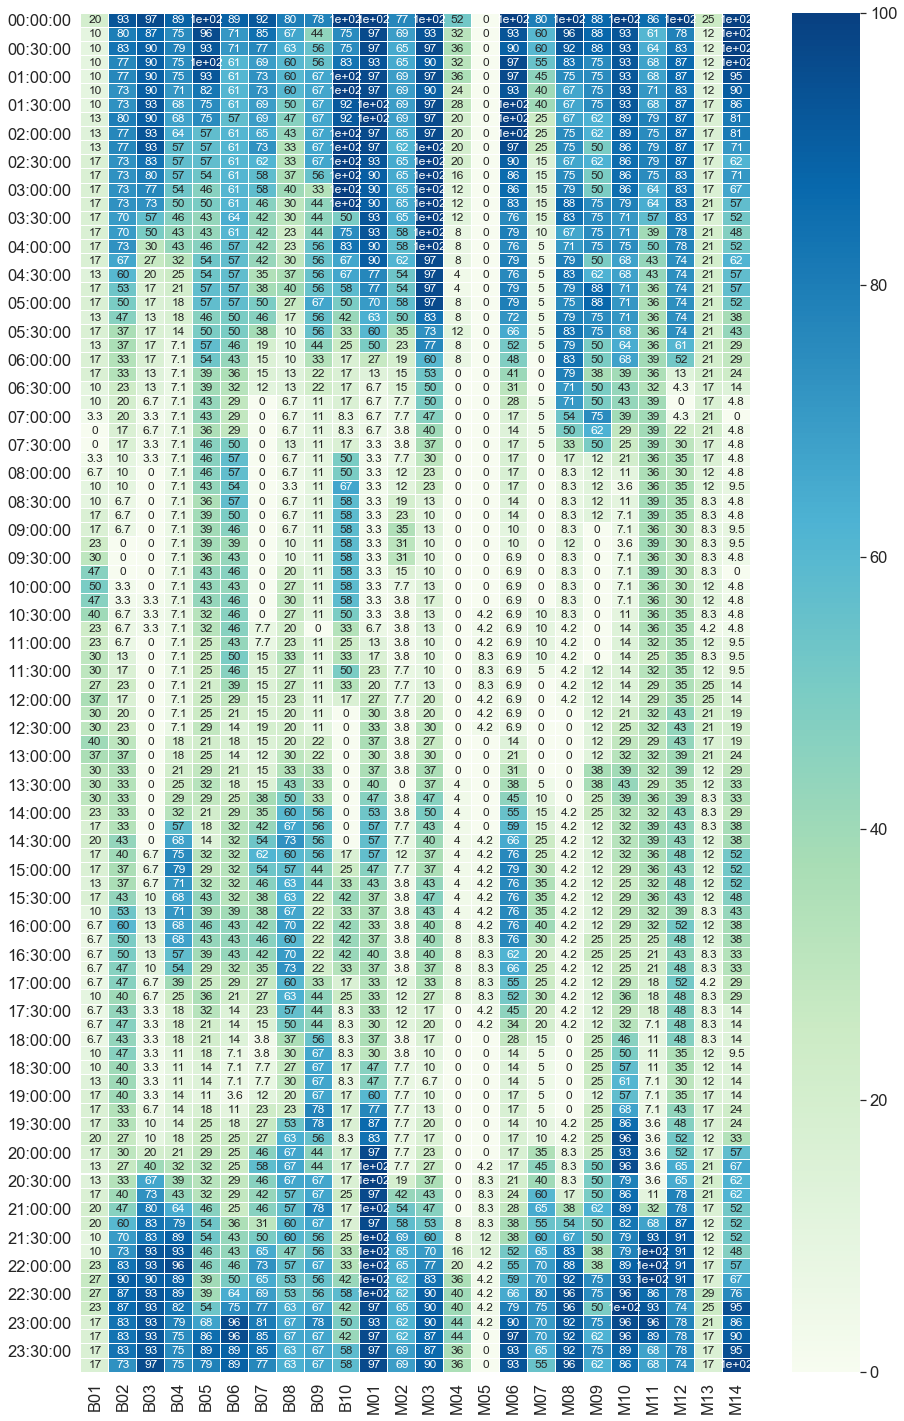

In [92]:
#plot the feature_df_19 and save in descriptive analysis folder

fig, ax = plt.subplots(figsize = (15, 25))

sns.heatmap(f_q, cmap ='GnBu', linewidths = 0.04, annot = True, annot_kws={'size': 12})
plt.yticks(rotation=0) 

plt.show()
# fig.savefig('FINAL/Descriptive statistics/clustering_features_quarterly_2019_789.png')

In [93]:
output_folder = 'D:/CEEW/Smart Meter Analysis/GSP_energy_disaggregator/FINAL/final1/clustering/'

In [105]:
fig.savefig(output_folder+'hourly_featuremap.png',dpi=600)

In [10]:
qf = pd.read_csv('FINAL/final1/clustering/15min_featuremap_renamed.csv',index_col = 0)

In [11]:
qf

,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,...,M05,M06,M07,M08,M09,M10,M11,M12,M13,M14
00:00:00,20.000000,93.333333,96.666667,89.285714,100.000000,89.285714,92.307692,80.000000,77.777778,100.000000,...,0.000000,100.000000,80,100.000000,87.5,100.000000,85.714286,100.000000,25.000000,100.000000
00:15:00,10.000000,80.000000,86.666667,75.000000,96.428571,71.428571,84.615385,66.666667,44.444444,75.000000,...,0.000000,93.103448,60,95.833333,87.5,92.857143,60.714286,78.260870,12.500000,100.000000
00:30:00,10.000000,83.333333,90.000000,78.571429,92.857143,71.428571,76.923077,63.333333,55.555556,75.000000,...,0.000000,89.655172,60,91.666667,87.5,92.857143,64.285714,82.608696,12.500000,100.000000
00:45:00,10.000000,76.666667,90.000000,75.000000,100.000000,60.714286,69.230769,60.000000,55.555556,83.333333,...,0.000000,96.551724,55,83.333333,75.0,92.857143,67.857143,86.956522,12.500000,100.000000
01:00:00,10.000000,76.666667,90.000000,75.000000,92.857143,60.714286,73.076923,60.000000,66.666667,100.000000,...,0.000000,96.551724,45,75.000000,75.0,92.857143,67.857143,86.956522,12.500000,95.238095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,23.333333,86.666667,93.333333,82.142857,53.571429,75.000000,76.923077,63.333333,66.666667,41.666667,...,4.166667,79.310345,75,95.833333,50.0,100.000000,92.857143,73.913043,25.000000,95.238095
23:00:00,16.666667,83.333333,93.333333,78.571429,67.857143,96.428571,80.769231,66.666667,77.777778,50.000000,...,4.166667,89.655172,70,91.666667,75.0,96.428571,96.428571,78.260870,20.833333,85.714286
23:15:00,16.666667,83.333333,93.333333,75.000000,85.714286,96.428571,84.615385,66.666667,66.666667,41.666667,...,0.000000,96.551724,70,91.666667,62.5,96.428571,89.285714,78.260870,16.666667,90.476190
23:30:00,16.666667,83.333333,93.333333,75.000000,89.285714,89.285714,84.615385,63.333333,66.666667,58.333333,...,0.000000,93.103448,65,91.666667,75.0,89.285714,67.857143,78.260870,16.666667,95.238095


In [13]:
qf.index = pd.to_datetime(qf.index)

In [15]:
qf.index = qf.index.hour

In [16]:
qf

,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,...,M05,M06,M07,M08,M09,M10,M11,M12,M13,M14
0,20.000000,93.333333,96.666667,89.285714,100.000000,89.285714,92.307692,80.000000,77.777778,100.000000,...,0.000000,100.000000,80,100.000000,87.5,100.000000,85.714286,100.000000,25.000000,100.000000
0,10.000000,80.000000,86.666667,75.000000,96.428571,71.428571,84.615385,66.666667,44.444444,75.000000,...,0.000000,93.103448,60,95.833333,87.5,92.857143,60.714286,78.260870,12.500000,100.000000
0,10.000000,83.333333,90.000000,78.571429,92.857143,71.428571,76.923077,63.333333,55.555556,75.000000,...,0.000000,89.655172,60,91.666667,87.5,92.857143,64.285714,82.608696,12.500000,100.000000
0,10.000000,76.666667,90.000000,75.000000,100.000000,60.714286,69.230769,60.000000,55.555556,83.333333,...,0.000000,96.551724,55,83.333333,75.0,92.857143,67.857143,86.956522,12.500000,100.000000
1,10.000000,76.666667,90.000000,75.000000,92.857143,60.714286,73.076923,60.000000,66.666667,100.000000,...,0.000000,96.551724,45,75.000000,75.0,92.857143,67.857143,86.956522,12.500000,95.238095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,23.333333,86.666667,93.333333,82.142857,53.571429,75.000000,76.923077,63.333333,66.666667,41.666667,...,4.166667,79.310345,75,95.833333,50.0,100.000000,92.857143,73.913043,25.000000,95.238095
23,16.666667,83.333333,93.333333,78.571429,67.857143,96.428571,80.769231,66.666667,77.777778,50.000000,...,4.166667,89.655172,70,91.666667,75.0,96.428571,96.428571,78.260870,20.833333,85.714286
23,16.666667,83.333333,93.333333,75.000000,85.714286,96.428571,84.615385,66.666667,66.666667,41.666667,...,0.000000,96.551724,70,91.666667,62.5,96.428571,89.285714,78.260870,16.666667,90.476190
23,16.666667,83.333333,93.333333,75.000000,89.285714,89.285714,84.615385,63.333333,66.666667,58.333333,...,0.000000,93.103448,65,91.666667,75.0,89.285714,67.857143,78.260870,16.666667,95.238095


NameError: name 'df' is not defined

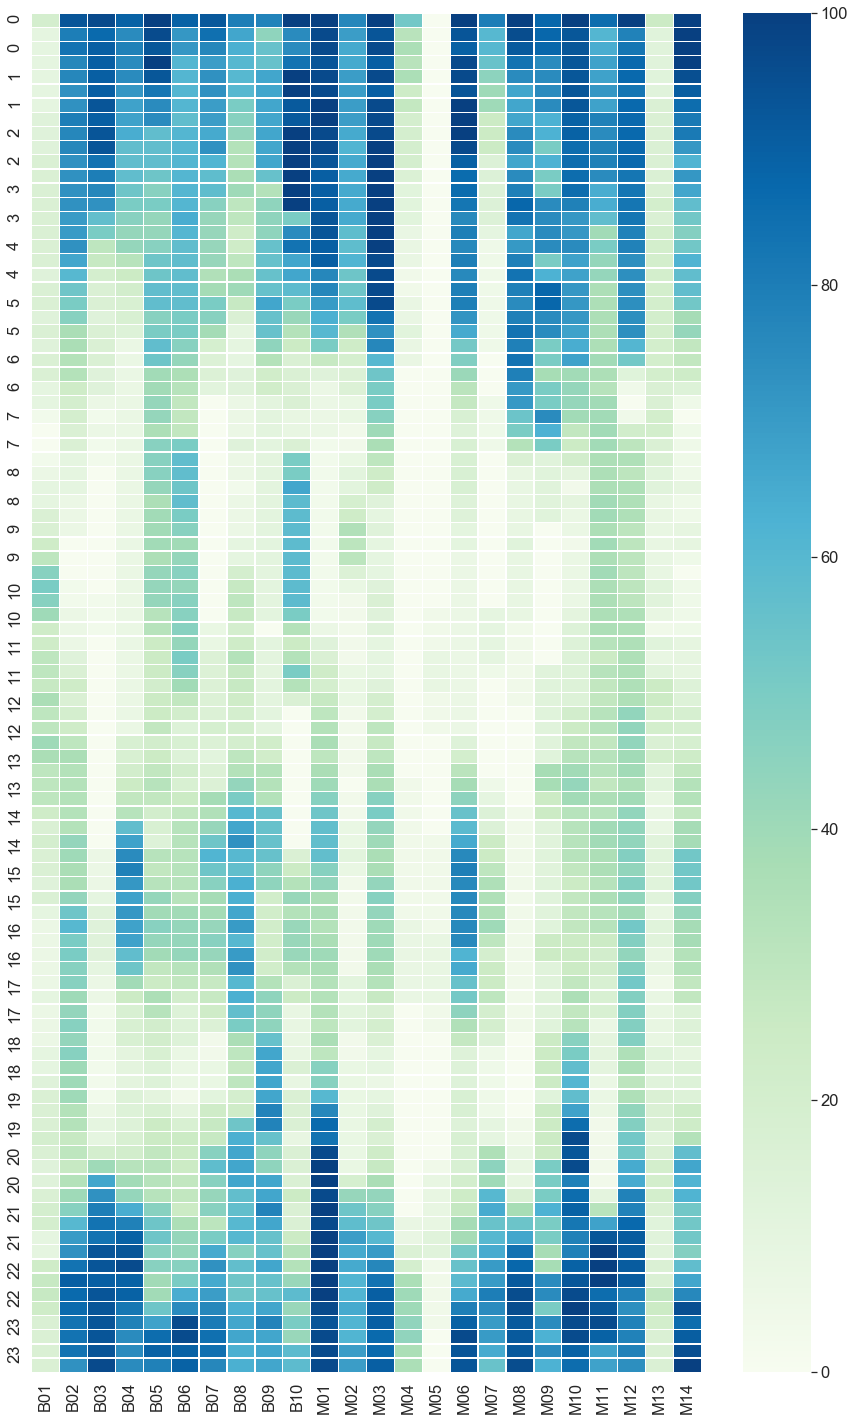

In [18]:
fig, ax = plt.subplots(figsize = (15, 25))

g = sns.heatmap(qf, cmap ='GnBu', linewidths = 0.30, annot = False, annot_kws={'size': 12})
g.set_xticks(range(len(df)/8))
plt.yticks(rotation=0) 

plt.show()
# fig.savefig('FINAL/Descriptive statistics/clustering_features_quarterly_2019_789.png')

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [110]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(feature_df_19)
    distortions.append(kmeanModel.inertia_)

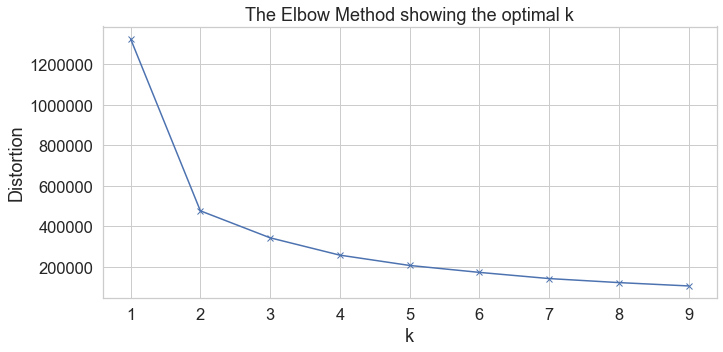

In [111]:
plt.figure(figsize=(11,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [127]:
df19 = feature_df_19

In [128]:
df19 = df19.T

In [129]:
copy19 = df19

Soft-DTW k-means
12898263.327 --> 3249729.768 --> 3243804.010 --> 3246976.420 --> 3244614.733 --> 3246507.668 --> 3245257.916 --> 3246359.026 --> 3245673.541 --> 3246311.793 --> 3245911.097 --> 3246286.076 --> 3246048.550 --> 3246270.345 --> 3246127.805 --> 3246259.055 --> 3246173.553 --> 3246252.252 --> 3246200.525 --> 3246247.611 --> 3246216.299 --> 3246244.904 --> 3246225.207 --> 3246242.658 --> 3246228.206 --> 3246228.533 --> 3246126.536 --> 3246151.751 --> 3246115.530 --> 3246127.064 --> 3246108.880 --> 3246115.466 --> 3246106.797 --> 3246110.185 --> 3246105.889 --> 3246107.416 --> 3246105.535 --> 3246106.339 --> 3246105.405 --> 3246105.838 --> 3246105.368 --> 3246105.482 --> 3246105.297 --> 3246105.353 --> 3246105.295 --> 3246105.295 --> 3246105.257 --> 3246105.257 --> 
[3, 6, 7, 9, 15, 16]
[0, 14, 22]
[1, 4, 5, 8, 11, 13, 18, 20]
[2, 10, 12, 17, 19, 21, 23]


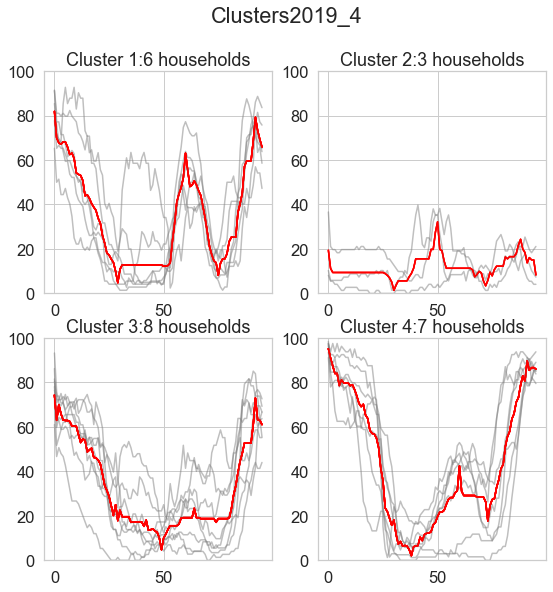

In [132]:
seed = 0
print("Soft-DTW k-means")
X_train = np.array(df19)
sdtw_km = TimeSeriesKMeans(n_clusters=4,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True)
y_pred = sdtw_km.fit_predict(df19)

yi = list(np.unique(y_pred))
fig = plot_som_series_dba_center(X_train, y_pred, yi,'Clusters2019_4', 'clusters2019_4_softdtw.png')
copy19['cluster'] = y_pred
# copy19.to_csv(output_folder+'predictions2019_6_softdtw.csv')

In [55]:
yi = [0,1,2,3]


In [58]:
def duplicates(lst, item):
    return [i for i, x in enumerate(lst) if x == item]

In [131]:

def plot_som_series_dba_center(X_train, y_pred, yi, title,filename):
    fig, axs = plt.subplots(2,2,figsize=(9,9))
    fig.suptitle(title)
    i = 0
    for x in range(2):
        for y in range(2):
            cluster = (x,y)
            ll = duplicates(y_pred,yi[i])
            print(ll)
            i = i+1
            for ind in ll:
                series = X_train[ind]
                axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(dtw_barycenter_averaging(np.vstack(X_train[ll])),c="red")
                axs[cluster].set_ylim(0, 100)# I changed this part
            cluster_number = i
            lh = len(ll)
            axs[cluster].set_title(f"Cluster {cluster_number}:{lh} households")

    plt.show()

In [61]:
from tslearn.clustering import TimeSeriesKMeans


C:\ProgramData\Anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [63]:
from tslearn.barycenters import dtw_barycenter_averaging


In [134]:
copy19.to_csv('FINAL/Descriptive statistics/clusters_2019_789.csv')

In [ ]:
c